In [2]:
pip install duckdb

   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
    --------------------------------------- 0.3/11.4 MB ? eta -:--:--
    --------------------------------------- 0.3/11.4 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.4 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.4 MB 1.9 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.4 MB 2.1 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.4 MB 2.1 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.4 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.4 MB 1.9 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.4 MB 1.9 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.4 MB 1.9 MB/s eta 0:00:05
   ----------- -------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import duckdb

In [6]:
pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.0 MB 1.8 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.0 MB 1.8 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.0 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.0 MB 1.7 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   ------------ ------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas

In [10]:
pixar_films = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-11/pixar_films.csv')

In [11]:
public_response = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-11/public_response.csv')

In [12]:
cn = duckdb.connect("pixar_films_data.db")

In [13]:
cn.execute("""
            INSTALL https;
            LOAD https;
            INSTALL excel;
            LOAD excel;
            """)

In [15]:
sql = """
        create or replace table pixar_data
        as 
        select number, film, release_date, run_time, film_rating
        from pixar_films
"""
cn.sql(sql)

In [16]:
cn.sql("select film, release_date, run_time, filM_rating, count(*) from pixar_data group by all order by 1 desc")

┌───────────────────┬──────────────┬──────────┬─────────────┬──────────────┐
│       film        │ release_date │ run_time │ film_rating │ count_star() │
│      varchar      │   varchar    │  double  │   varchar   │    int64     │
├───────────────────┼──────────────┼──────────┼─────────────┼──────────────┤
│ WALL-E            │ 2008-06-27   │     98.0 │ G           │            1 │
│ Up                │ 2009-05-29   │     96.0 │ PG          │            1 │
│ Turning Red       │ 2022-03-11   │     NULL │ NULL        │            1 │
│ Toy Story 4       │ 2019-06-21   │    100.0 │ G           │            1 │
│ Toy Story 3       │ 2010-06-18   │    103.0 │ G           │            1 │
│ Toy Story 2       │ 1999-11-24   │     92.0 │ G           │            1 │
│ Toy Story         │ 1995-11-22   │     81.0 │ G           │            1 │
│ The Incredibles   │ 2004-11-05   │    115.0 │ PG          │            1 │
│ The Good Dinosaur │ 2015-11-25   │     93.0 │ PG          │            1 │

In [29]:
# Which films have the highest score in each rating system?
# rotten_tomatoes
sql = """
        create or replace table response_data
        as 
        select film, rotten_tomatoes, metacritic, cinema_score, critics_choice
        from public_response
"""
cn.sql(sql)
cn.sql("select pixar.film, max(response.rotten_tomatoes) as score from pixar_data pixar join response_data response on pixar.film = response.film group by pixar.film order by max(response.rotten_tomatoes) desc limit 2")

┌─────────────┬────────┐
│    film     │ score  │
│   varchar   │ double │
├─────────────┼────────┤
│ Toy Story 2 │  100.0 │
│ Toy Story   │  100.0 │
└─────────────┴────────┘

In [30]:
cn.sql("select pixar.film, max(response.metacritic) as score from pixar_data pixar join response_data response on pixar.film = response.film group by pixar.film order by max(response.metacritic) desc limit 2")

┌─────────────┬────────┐
│    film     │ score  │
│   varchar   │ double │
├─────────────┼────────┤
│ Ratatouille │   96.0 │
│ Toy Story   │   95.0 │
└─────────────┴────────┘

In [32]:
cn.sql("select pixar.film, max(response.cinema_score) as score from pixar_data pixar join response_data response on pixar.film = response.film group by pixar.film order by max(response.cinema_score)limit 2")

┌─────────────────────┬─────────┐
│        film         │  score  │
│       varchar       │ varchar │
├─────────────────────┼─────────┤
│ Monsters University │ A       │
│ Cars 3              │ A       │
└─────────────────────┴─────────┘

In [33]:
cn.sql("select pixar.film, max(response.critics_choice) as score from pixar_data pixar join response_data response on pixar.film = response.film group by pixar.film order by max(response.critics_choice) desc limit 2")

┌─────────────┬────────┐
│    film     │ score  │
│   varchar   │ double │
├─────────────┼────────┤
│ Toy Story 2 │  100.0 │
│ Toy Story 3 │   97.0 │
└─────────────┴────────┘

In [39]:
box_office = pandas.read_csv('https://raw.githubusercontent.com/erictleung/pixarfilms/master/data-raw/box_office.csv')

In [40]:
box_office

,film,budget,box_office_us_canada,box_office_other,box_office_worldwide
0,Toy Story,30000000.0,223225679,171210907,394436586
1,A Bug's Life,120000000.0,162798565,200460294,363258859
2,Toy Story 2,90000000.0,245852179,265506097,511358276
3,"Monsters, Inc.",115000000.0,255873250,272900000,528773250
4,Finding Nemo,94000000.0,339714978,531300000,871014978
5,The Incredibles,92000000.0,261441092,370001000,631442092
6,Cars,120000000.0,244082982,217900167,461983149
7,Ratatouille,150000000.0,206445654,417280431,623726085
8,WALL-E,180000000.0,223808164,297503696,521311860
9,Up,175000000.0,293004164,442094918,735099082


In [41]:
# How does the box_office_us_canada value compare to the various ratings?
# Is the trend different for box_office_worldwide?

In [43]:
pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.3 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.1 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 2.0 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 2.0 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 1.9 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 1.3 MB/s eta 0:00:04
   ------------------- ----------

In [69]:
import matplotlib.pyplot as plt

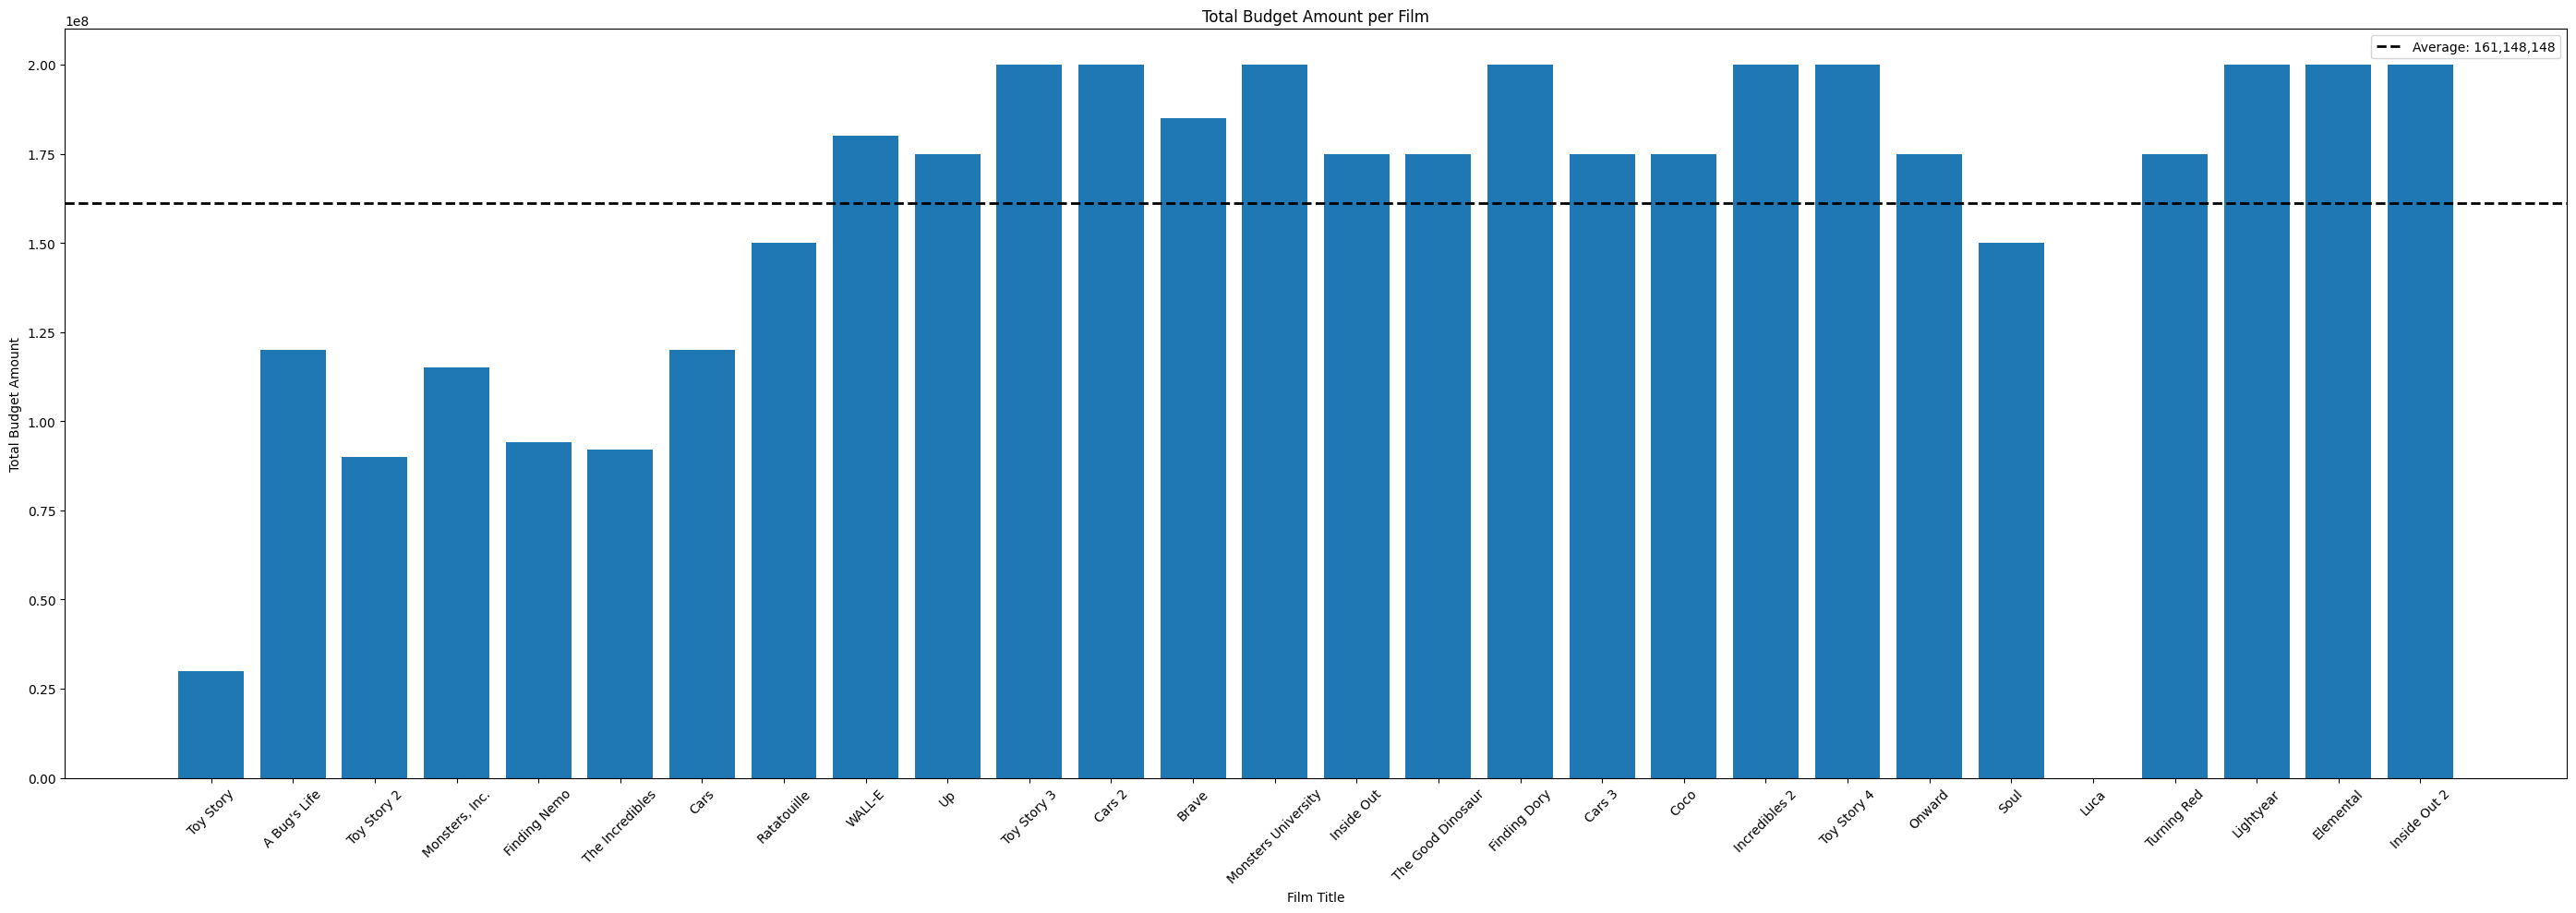

In [102]:
sql = """
        create or replace table box_office_data
        as 
        select film, budget, box_office_us_canada, box_office_other, box_office_worldwide
        from box_office
"""
cn.sql(sql)

df = cn.sql("select * from box_office_data").df()

plt.figure(figsize=(28,10))
plt.bar(df['film'], df['budget'])
avg_total_budget = df['budget'].mean()

# Add a dashed black line for the average 
plt.axhline(avg_total_budget, color='black', linestyle='dashed', linewidth=2, label=f'Average: {avg_total_budget:,.0f}')

plt.xlabel('Film Title')
plt.ylabel('Total Budget Amount')
plt.title('Total Budget Amount per Film')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

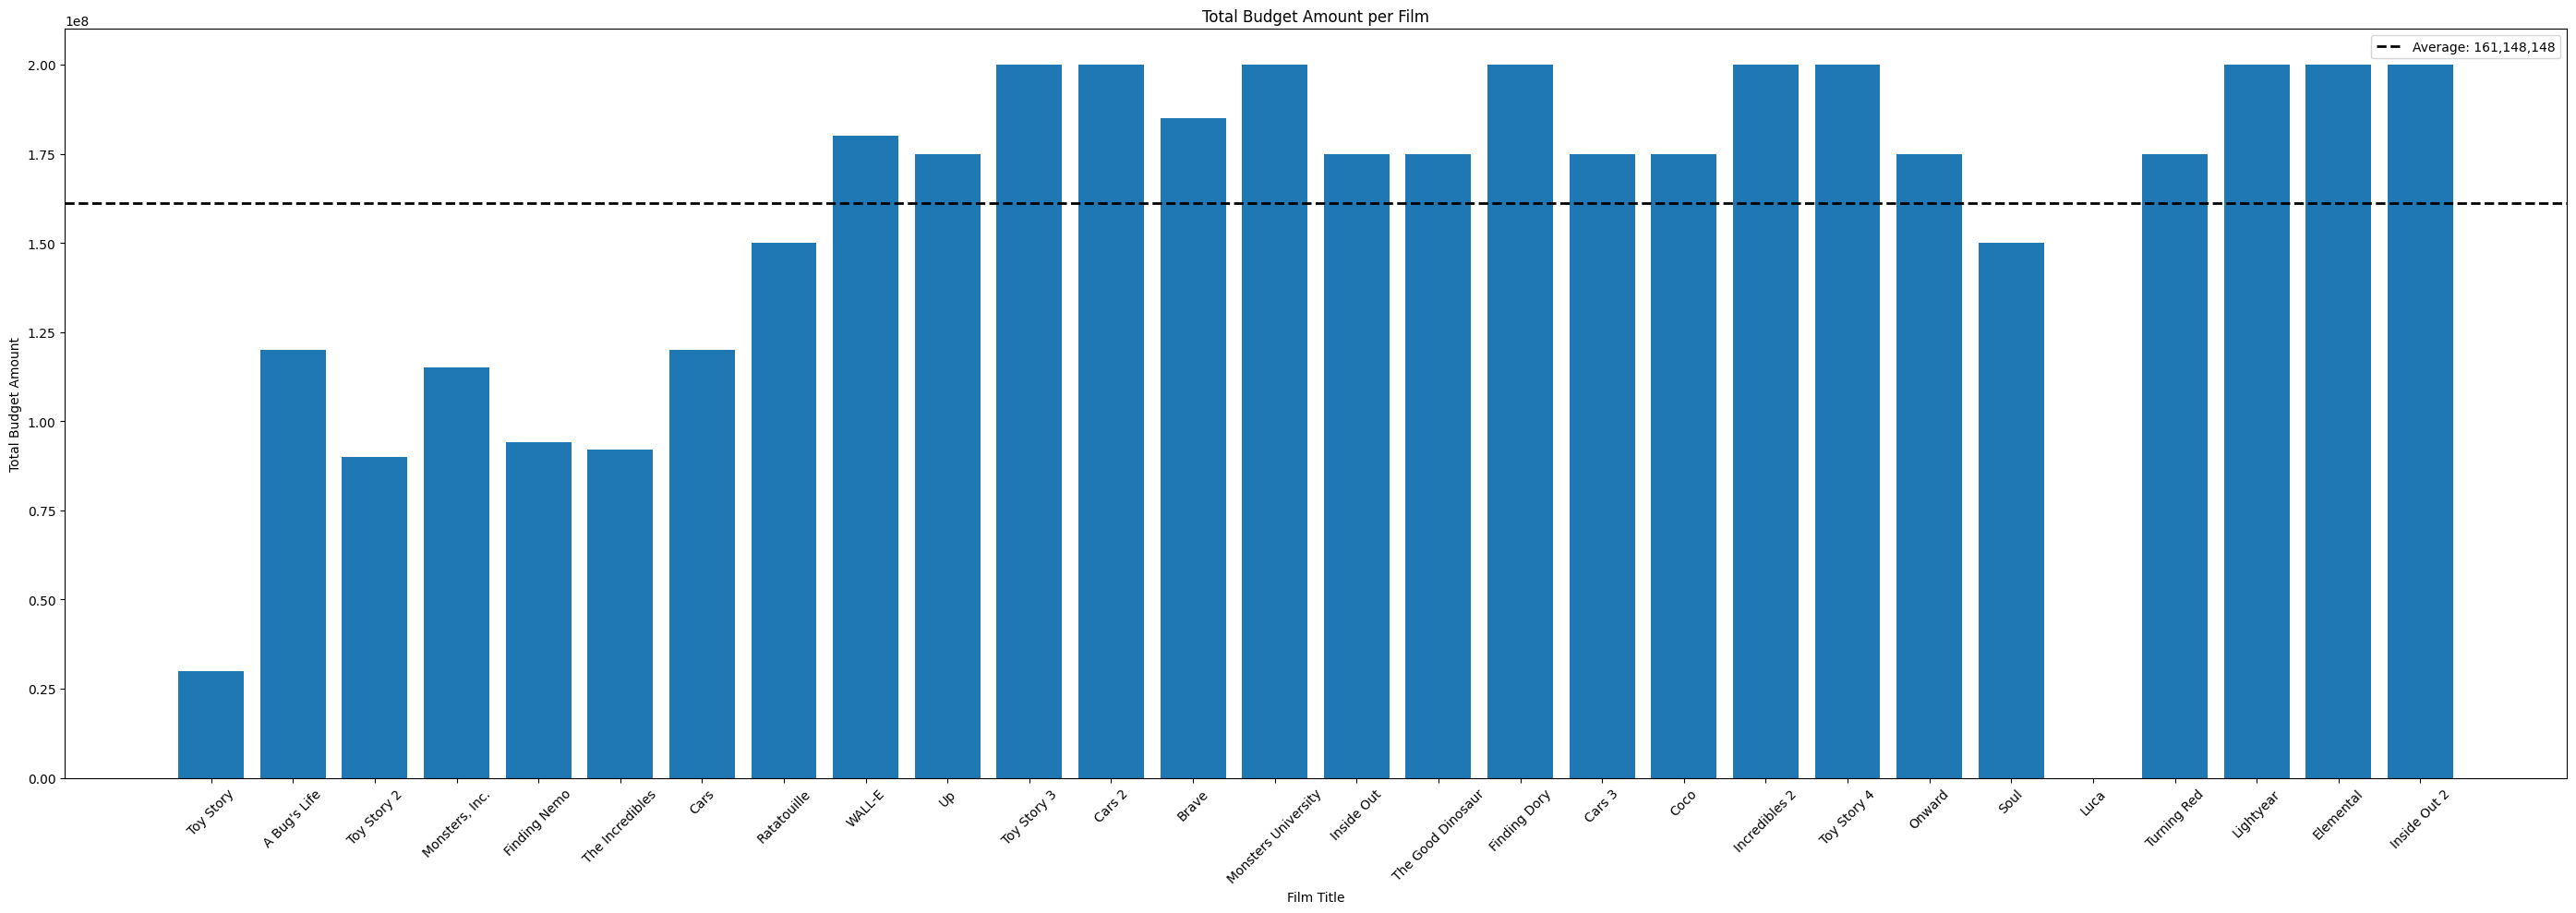

In [102]:
sql = """
        create or replace table box_office_data
        as 
        select film, budget, box_office_us_canada, box_office_other, box_office_worldwide
        from box_office
"""
cn.sql(sql)

df = cn.sql("select * from box_office_data").df()

plt.figure(figsize=(28,10))
plt.bar(df['film'], df['budget'])
avg_total_budget = df['budget'].mean()

# Add a dashed black line for the average 
plt.axhline(avg_total_budget, color='black', linestyle='dashed', linewidth=2, label=f'Average: {avg_total_budget:,.0f}')

plt.xlabel('Film Title')
plt.ylabel('Total Budget Amount')
plt.title('Total Budget Amount per Film')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()